In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Gen_data(N, d, rnd, t=0.1):
    """
    Generate N data with d dimension
    """
    X = []
    w = np.ones(d)
    while (len(X) < N):
        x = rnd.uniform(-1, 1, size=(d))
        if np.abs(x.dot(w)) >= t:
            X.append(x)
    X = np.array(X)
    y = 2 * (X.dot(w) > 0) - 1
    X = np.c_[np.ones((N, 1)), X]
    return X, y

In [3]:
def Discriminant(X, y, w):
    """
    Discriminant function
    """
    n = X.shape[0]
    num = np.sum(X.dot(w) * y > 0)
    return num == n

In [4]:
def Obj_func(N, d, rr, t=0.1, r=1):
    """
    Update data by PLA
    """
    X, y = Gen_data(N, d, rr, t=t)
    s = 0
    w = np.zeros(d + 1)
    n = X.shape[0]
    if r == 1:
        while (Discriminant(X, y ,w) == 0):
            for i in range(n):
                if X[i, :].dot(w) * y[i] <= 0:
                    w += y[i] * X[i, :]
                    s += 1
    else:
        while (Discriminant(X, y ,w) == 0):
            i = np.random.randint(0, N)
            if X[i, :].dot(w) * y[i] <= 0:
                w += y[i] * X[i, :]
                s += 1
    a = np.arange(-1, 1, 0.1)
    b = np.array([(i * w[1] + w[0]) / (-w[2]) for i in a])
    c = t - a
    return a, b, c, X, y, s, w

In [5]:
def plot_fig(a, b, c, X, y, s, w, t=0.1):
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='r', s=1)
    plt.scatter(X[y == -1][:, 1], X[y == -1][:, 2], c='b', s=1)
    plt.plot(a, b, label="("+str(w[0])+")+("+str(w[1])+")x1+("+str(w[2])+")x2=0")
    plt.plot(a, c, label="x1+x2="+str(t))
    plt.title(u"Convergence after "+str(s)+u" times ")
    plt.legend()
    plt.show()

In [6]:
def main():
    seed = 2019
    rr = np.random.RandomState(seed)
    N = 20
    d = 2
    a, b, c, X, y, s, w = Obj_func(N, d, rr)
    plot_fig(a, b, c, X, y, s, w)

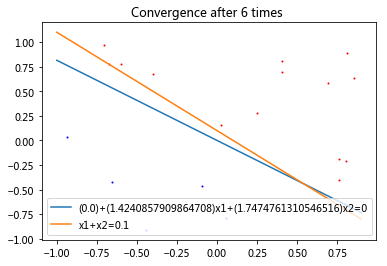

In [7]:
main()